In [2]:
from preprocessing import data_loader
from model import CNN
from model_new import CNN2
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from preprocessing import AlexEmbed
from torch.utils.data import DataLoader
alexembed = AlexEmbed()

from train import performance_per_class
from train import train

torch.manual_seed(123)

In [12]:
import numpy as np
def new_dataset(batch_size=1, dire = "alex_embedding_set"):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(0)

    train_loader, val_loader = data_loader(batch_size=batch_size, shuffle=False)
    id=0
    for batch in tqdm(train_loader):
        imgs, labels = batch.values()
        labels = torch.argmax(labels, dim=1)
        np.save(f"{dire}/embed_{id}", imgs.numpy())
        np.save(f"{dire}/label_{id}", labels.numpy())
        id += 1
    
    for batch in tqdm(val_loader):
        imgs, labels = batch.values()
        labels = torch.argmax(labels, dim=1)
        np.save(f"{dire}/embed_{id}", imgs.numpy())
        np.save(f"{dire}/label_{id}", labels.numpy())
        id += 1

In [13]:
new_dataset()

100%|██████████| 2520/2520 [00:33<00:00, 75.49it/s] 


In [2]:
train_size = int(0.7 * len(alexembed))
val_size = len(alexembed) - train_size
train_set, val_set = torch.utils.data.random_split(alexembed, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=256, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1024, shuffle=True)

In [6]:
from train import train



Attempt 1: BS = 2

In [2]:
net = CNN2()
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader)
#error_rate, wrong_guess_rate, guesses = performance_per_class(net)

NameError: name 'CNN2' is not defined

(30,)


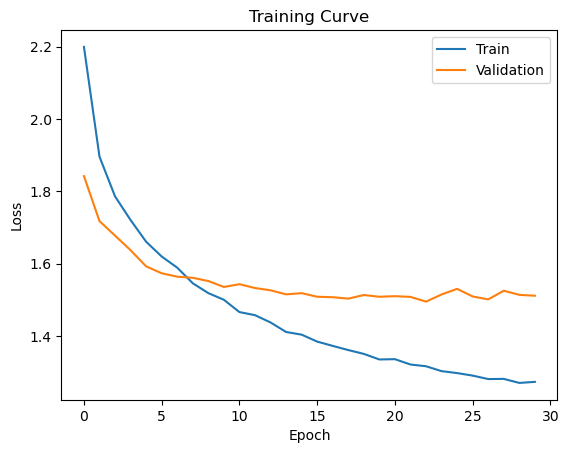

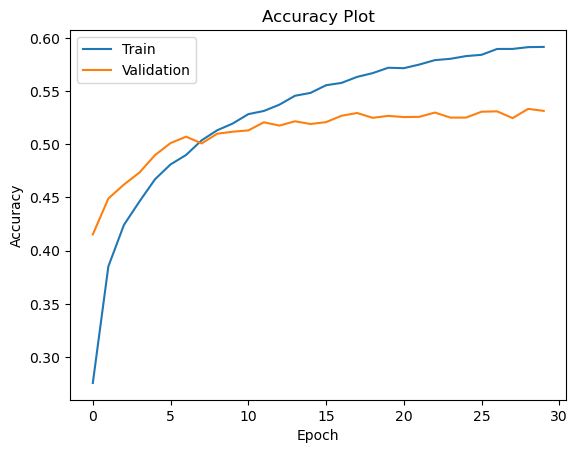

In [13]:
epoch_size = 30
epochs = np.linspace(0, 29, num=30)
train_acc = np.full(30, 1) - train_err
val_acc = np.full(30, 1) - val_err

print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


In [6]:
net = CNN2()
net.load_state_dict(torch.load("./bs64_lr0.001_epoch21", map_location=torch.device('cpu')))

<All keys matched successfully>

In [9]:
error_rate, wrong_guess_rate, guesses = performance_per_class(net)
print("The error rate is:"+ str(error_rate))
print(wrong_guess_rate)
print(guesses)

10
4
13
10
6
14
5
1
1
5
6
3
11
13
7
14
6
11
1
11
7
14
4
7
11
10
6
1
3
10
10
8
6
6
12
11
3
14
0
1
10
4
6
1
10
12
11
10
7
5
4
0
10
0
12
12
13
13
7
2
13
6
4
6
4
9
10
12
5
11
9
14
13
8
6
12
4
4
12
13
4
13
11
9
8
8
4
0
3
9
12
5
8
6
1
6
6
11
11
13
9
0
9
2
6
2
10
7
13
10
6
1
14
11
10
10
3
1
10
8
2
3
5
1
1
2
6
7
4
4
13
1
8
11
7
10
6
4
11
3
11
11
6
8
2
1
9
7
7
13
5
1
11
11
4
3
10
0
10
13
6
1
13
1
9
2
7
4
12
0
9
6
4
13
11
5
1
4
3
3
6
2
9
2
12
0
10
2
10
7
14
0
1
12
11
0
7
10
5
0
2
1
12
0
14
13
8
4
9
4
13
8
4
9
5
10
1
12
4
6
13
4
7
13
9
11
0
4
12
1
11
7
0
11
1
0
12
3
11
9
4
5
0
5
11
1
5
12
13
0
5
1
13
13
2
7
4
12
12
1
2
11
10
1
7
2
13
5
13
11
4
11
1
4
13
6
4
2
11
0
9
8
5
12
5
4
9
4
3
11
12
2
10
14
6
14
6
6
13
11
1
2
11
11
13
2
9
12
3
11
11
7
3
1
3
9
12
5
11
6
4
6
1
7
8
6
1
14
5
6
8
7
5
13
2
10
5
2
9
3
7
8
3
5
10
8
10
9
5
8
8
9
8
2
6
0
10
6
8
4
11
6
1
2
4
9
9
2
13
12
7
4
8
8
9
9
12
8
8
6
3
12
12
9
7
10
6
0
1
12
14
1
12
11
5
12
7
6
1
10
10
3
7
3
8
0
0
11
14
13
5
4
10
6
0
0
0
12
9
1
8
14
13
1
12
4
12

In [8]:
net = CNN2()
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader, batch_size = 256, lr=0.0005, num_epochs = 30)


  3%|▎         | 1/30 [00:56<27:17, 56.47s/it]

Epoch 0: Train err: 0.7472870100421121 Val err: 0.5962301587301587 Train loss: 2.2597159530214697 Val loss: 1.896952504203433


  7%|▋         | 2/30 [01:53<26:31, 56.83s/it]

Epoch 1: Train err: 0.6412374473598963 Val err: 0.5565003779289494 Train loss: 1.9637209343786683 Val loss: 1.76057197366442


 10%|█         | 3/30 [02:53<26:11, 58.22s/it]

Epoch 2: Train err: 0.597424684159378 Val err: 0.5378401360544217 Train loss: 1.842548832992198 Val loss: 1.6818625870205106


 13%|█▎        | 4/30 [04:02<27:00, 62.32s/it]

Epoch 3: Train err: 0.5690192743764172 Val err: 0.5295256991685563 Train loss: 1.7585512807332173 Val loss: 1.6505598624547322


 17%|█▋        | 5/30 [05:04<26:02, 62.51s/it]

Epoch 4: Train err: 0.5445213799805636 Val err: 0.5086923658352229 Train loss: 1.6916248829253597 Val loss: 1.591367244720459


 20%|██        | 6/30 [06:06<24:54, 62.25s/it]

Epoch 5: Train err: 0.5286078717201166 Val err: 0.5035430839002267 Train loss: 1.6445979577889713 Val loss: 1.5753364676520938


 23%|██▎       | 7/30 [07:07<23:40, 61.75s/it]

Epoch 6: Train err: 0.512532393909945 Val err: 0.5005668934240363 Train loss: 1.5966306066265996 Val loss: 1.5636806885401409


 27%|██▋       | 8/30 [08:07<22:24, 61.11s/it]

Epoch 7: Train err: 0.5044136702299967 Val err: 0.4985355253212396 Train loss: 1.5598295704688432 Val loss: 1.562485002336048


 30%|███       | 9/30 [09:08<21:26, 61.28s/it]

Epoch 8: Train err: 0.487325882734046 Val err: 0.4938586545729403 Train loss: 1.5230856164131759 Val loss: 1.5335029306865873


 33%|███▎      | 10/30 [10:09<20:20, 61.00s/it]

Epoch 9: Train err: 0.48236556527372854 Val err: 0.4882369614512472 Train loss: 1.494008649816167 Val loss: 1.5297890901565552


 37%|███▋      | 11/30 [11:11<19:26, 61.38s/it]

Epoch 10: Train err: 0.4735989633948818 Val err: 0.4885204081632653 Train loss: 1.4665129332962432 Val loss: 1.5249191976728893


 40%|████      | 12/30 [12:13<18:29, 61.65s/it]

Epoch 11: Train err: 0.46422497570456756 Val err: 0.4808201058201058 Train loss: 1.4415825506566102 Val loss: 1.5069047609965007


 43%|████▎     | 13/30 [13:14<17:23, 61.41s/it]

Epoch 12: Train err: 0.45754373177842567 Val err: 0.47874149659863946 Train loss: 1.4180787937628792 Val loss: 1.5016895475841703


 47%|████▋     | 14/30 [14:14<16:16, 61.00s/it]

Epoch 13: Train err: 0.44916180758017493 Val err: 0.4818121693121693 Train loss: 1.3892865977756719 Val loss: 1.511051785378229


 50%|█████     | 15/30 [15:14<15:10, 60.72s/it]

Epoch 14: Train err: 0.4415694849368319 Val err: 0.47926114890400606 Train loss: 1.3705595453786108 Val loss: 1.501935879389445


 53%|█████▎    | 16/30 [16:14<14:08, 60.58s/it]

Epoch 15: Train err: 0.43867427923550373 Val err: 0.4755291005291005 Train loss: 1.3557568819411678 Val loss: 1.4978791248230707


 57%|█████▋    | 17/30 [17:15<13:05, 60.45s/it]

Epoch 16: Train err: 0.4325599287333981 Val err: 0.47642668178382463 Train loss: 1.3378347226375125 Val loss: 1.4933095205397833


 60%|██████    | 18/30 [18:14<12:02, 60.19s/it]

Epoch 17: Train err: 0.42557499190152254 Val err: 0.47458427815570675 Train loss: 1.3178135391344061 Val loss: 1.4845374765850248


 63%|██████▎   | 19/30 [19:15<11:04, 60.38s/it]

Epoch 18: Train err: 0.4232061872367995 Val err: 0.47023809523809523 Train loss: 1.308595489343831 Val loss: 1.4878826141357422


 67%|██████▋   | 20/30 [20:15<10:02, 60.25s/it]

Epoch 19: Train err: 0.41697035957240036 Val err: 0.4676398337112623 Train loss: 1.2886603212109502 Val loss: 1.4797728118442355


 70%|███████   | 21/30 [21:14<09:00, 60.05s/it]

Epoch 20: Train err: 0.41573534175574994 Val err: 0.47250566893424034 Train loss: 1.2784416459384977 Val loss: 1.4924384752909343


 73%|███████▎  | 22/30 [22:15<08:01, 60.23s/it]

Epoch 21: Train err: 0.4093375445416262 Val err: 0.46877362055933486 Train loss: 1.267092283525615 Val loss: 1.488460273969741


 77%|███████▋  | 23/30 [23:11<06:52, 58.95s/it]

Epoch 22: Train err: 0.4048428895367671 Val err: 0.4681594860166289 Train loss: 1.258891497868948 Val loss: 1.4813104300271898


 80%|████████  | 24/30 [24:05<05:43, 57.30s/it]

Epoch 23: Train err: 0.40387107223841917 Val err: 0.4643801965230537 Train loss: 1.239833946672746 Val loss: 1.47672856989361


 83%|████████▎ | 25/30 [25:03<04:47, 57.54s/it]

Epoch 24: Train err: 0.394881762228701 Val err: 0.46400226757369617 Train loss: 1.2259793825100123 Val loss: 1.4810936905088878


 87%|████████▋ | 26/30 [26:00<03:49, 57.35s/it]

Epoch 25: Train err: 0.39156138645934563 Val err: 0.4666950113378685 Train loss: 1.2155572367455676 Val loss: 1.4810442129770915


 90%|█████████ | 27/30 [26:57<02:51, 57.28s/it]

Epoch 26: Train err: 0.3940314220926466 Val err: 0.4680177626606198 Train loss: 1.2125279279570504 Val loss: 1.488182788803464


 93%|█████████▎| 28/30 [27:53<01:53, 56.99s/it]

Epoch 27: Train err: 0.3895165208940719 Val err: 0.46381330309901736 Train loss: 1.199781627852682 Val loss: 1.492828329404195


 97%|█████████▋| 29/30 [28:50<00:57, 57.01s/it]

Epoch 28: Train err: 0.38656057661159704 Val err: 0.46390778533635674 Train loss: 1.1858722697267878 Val loss: 1.477362144561041


100%|██████████| 30/30 [29:47<00:00, 59.57s/it]

Epoch 29: Train err: 0.3801425332037577 Val err: 0.46343537414965985 Train loss: 1.1766471062917165 Val loss: 1.4787816660744804


Saved as bs256_lr0.0001_epoch29

In [11]:
net = CNN2(fc1_out = 256, fc2_out = 64, dropout = 0.3)
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader, batch_size = 128, lr=0.0001, num_epochs = 30)


  3%|▎         | 1/30 [01:00<29:25, 60.88s/it]

Epoch 0: Train err: 0.7590298023971493 Val err: 0.6127173091458806 Train loss: 2.3379492765881236 Val loss: 1.9806979440507435


  7%|▋         | 2/30 [02:01<28:23, 60.84s/it]

Epoch 1: Train err: 0.6433430515063168 Val err: 0.5640589569160998 Train loss: 1.9964069473928738 Val loss: 1.8096825111479986


 10%|█         | 3/30 [02:58<26:29, 58.89s/it]

Epoch 2: Train err: 0.5973234531908002 Val err: 0.544359410430839 Train loss: 1.8593884675613956 Val loss: 1.7116454442342122


 13%|█▎        | 4/30 [03:54<25:02, 57.77s/it]

Epoch 3: Train err: 0.5653749595076125 Val err: 0.529572940287226 Train loss: 1.763913068128991 Val loss: 1.6600658950351534


 17%|█▋        | 5/30 [04:50<23:53, 57.33s/it]

Epoch 4: Train err: 0.5425574991901523 Val err: 0.51828231292517 Train loss: 1.6928667299488047 Val loss: 1.6142648458480835


 20%|██        | 6/30 [05:47<22:47, 56.98s/it]

Epoch 5: Train err: 0.5257531584062196 Val err: 0.5070861678004536 Train loss: 1.6378286088686533 Val loss: 1.581022063891093


 23%|██▎       | 7/30 [06:43<21:48, 56.89s/it]

Epoch 6: Train err: 0.5051627793974732 Val err: 0.5 Train loss: 1.5800312738962123 Val loss: 1.5524935722351074


 27%|██▋       | 8/30 [07:41<20:57, 57.14s/it]

Epoch 7: Train err: 0.49283284742468414 Val err: 0.49551209372637944 Train loss: 1.5364044855295684 Val loss: 1.532399853070577


 30%|███       | 9/30 [08:38<19:58, 57.06s/it]

Epoch 8: Train err: 0.4797942986718497 Val err: 0.48733938019652306 Train loss: 1.4927353055983628 Val loss: 1.506477849824088


 33%|███▎      | 10/30 [09:35<18:58, 56.94s/it]

Epoch 9: Train err: 0.4699748947197927 Val err: 0.48261526832955404 Train loss: 1.454860745934007 Val loss: 1.4931722992942447


 37%|███▋      | 11/30 [10:30<17:55, 56.59s/it]

Epoch 10: Train err: 0.45503320375769357 Val err: 0.47869425547996974 Train loss: 1.4152198091072121 Val loss: 1.4768889915375483


 40%|████      | 12/30 [11:26<16:55, 56.41s/it]

Epoch 11: Train err: 0.4430879494655005 Val err: 0.476379440665155 Train loss: 1.3772535083207442 Val loss: 1.468260679926191


 43%|████▎     | 13/30 [12:23<15:57, 56.35s/it]

Epoch 12: Train err: 0.4314868804664723 Val err: 0.468442932728647 Train loss: 1.3479454257945322 Val loss: 1.449897811526344


 47%|████▋     | 14/30 [13:21<15:13, 57.09s/it]

Epoch 13: Train err: 0.42025024295432456 Val err: 0.46499433106575966 Train loss: 1.3056376048320315 Val loss: 1.4340171019236247


 50%|█████     | 15/30 [14:24<14:41, 58.80s/it]

Epoch 14: Train err: 0.412151765468092 Val err: 0.4651360544217687 Train loss: 1.279608470170609 Val loss: 1.4363467523029871


 53%|█████▎    | 16/30 [15:21<13:35, 58.22s/it]

Epoch 15: Train err: 0.40314220926465827 Val err: 0.4623015873015873 Train loss: 1.2549388068945297 Val loss: 1.4246364718391782


 57%|█████▋    | 17/30 [16:17<12:28, 57.57s/it]

Epoch 16: Train err: 0.39340379008746357 Val err: 0.4560657596371882 Train loss: 1.2194692205270954 Val loss: 1.4083849078132993


 60%|██████    | 18/30 [17:14<11:27, 57.28s/it]

Epoch 17: Train err: 0.3819039520570133 Val err: 0.4557823129251701 Train loss: 1.188081829041397 Val loss: 1.3990869181496757


 63%|██████▎   | 19/30 [18:10<10:26, 56.92s/it]

Epoch 18: Train err: 0.374372367994817 Val err: 0.4514833711262283 Train loss: 1.1630107476303615 Val loss: 1.392504334449768


 67%|██████▋   | 20/30 [19:06<09:27, 56.74s/it]

Epoch 19: Train err: 0.3650186264982183 Val err: 0.4470899470899471 Train loss: 1.1382626468035841 Val loss: 1.3805857272375197


 70%|███████   | 21/30 [20:02<08:28, 56.47s/it]

Epoch 20: Train err: 0.36040249433106575 Val err: 0.4451530612244898 Train loss: 1.1106432701021896 Val loss: 1.3744568540936424


 73%|███████▎  | 22/30 [20:58<07:31, 56.44s/it]

Epoch 21: Train err: 0.349408811143505 Val err: 0.4426965230536659 Train loss: 1.0857719216939699 Val loss: 1.3729025352568853


 77%|███████▋  | 23/30 [21:55<06:34, 56.41s/it]

Epoch 22: Train err: 0.3421201814058957 Val err: 0.44212962962962965 Train loss: 1.0556415288559513 Val loss: 1.3741322755813599


 80%|████████  | 24/30 [22:51<05:37, 56.25s/it]

Epoch 23: Train err: 0.3324425008098478 Val err: 0.43806689342403626 Train loss: 1.0326927467949032 Val loss: 1.3593127330144246


 83%|████████▎ | 25/30 [23:47<04:41, 56.28s/it]

Epoch 24: Train err: 0.328271784904438 Val err: 0.43490173847316704 Train loss: 1.0118624283859767 Val loss: 1.3523525113151187


 87%|████████▋ | 26/30 [24:43<03:44, 56.22s/it]

Epoch 25: Train err: 0.3218942338840298 Val err: 0.43287037037037035 Train loss: 0.9911969195993453 Val loss: 1.3530619144439697


 90%|█████████ | 27/30 [25:40<02:49, 56.38s/it]

Epoch 26: Train err: 0.3119938451571105 Val err: 0.4332482993197279 Train loss: 0.9636288992481529 Val loss: 1.3442214784168063


 93%|█████████▎| 28/30 [26:37<01:53, 56.63s/it]

Epoch 27: Train err: 0.30369290573372204 Val err: 0.4313586545729403 Train loss: 0.942049803202634 Val loss: 1.3476159004938035


 97%|█████████▋| 29/30 [27:33<00:56, 56.33s/it]

Epoch 28: Train err: 0.2959993521218011 Val err: 0.4286659108087679 Train loss: 0.9155420173017472 Val loss: 1.342955129487174


100%|██████████| 30/30 [28:28<00:00, 56.97s/it]

Epoch 29: Train err: 0.29045189504373176 Val err: 0.4263983371126228 Train loss: 0.9026751249565361 Val loss: 1.3434587376458305


In [8]:
dataloader = DataLoader(alexembed, batch_size=64, shuffle=True)
for sample_batched in dataloader:
    print(sample_batched['image'].shape)
    print(sample_batched['label'].shape)
    break

torch.Size([64, 1, 256, 6, 6])
torch.Size([64, 1, 256, 6, 6])


(30,)


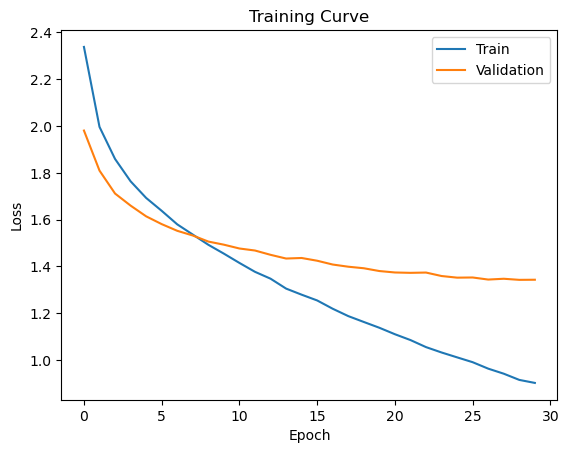

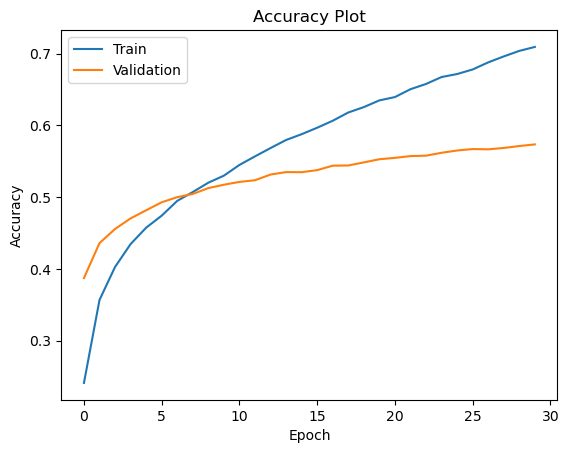

In [12]:
epoch_size = 30
epochs = np.linspace(0, 29, num=30)
train_acc = np.full(30, 1) - train_err
val_acc = np.full(30, 1) - val_err

#print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [13]:
net = CNN2(fc1_out = 256, fc2_out = 64, dropout = 0.4)
train_err, train_loss, val_err, val_loss = train(net, train_loader, val_loader, batch_size = 256, lr=0.0001, num_epochs = 30)


  3%|▎         | 1/30 [00:55<27:00, 55.86s/it]

Epoch 0: Train err: 0.7916261742792355 Val err: 0.627739984882842 Train loss: 2.4108923420387227 Val loss: 2.052453290848505


  7%|▋         | 2/30 [01:49<25:22, 54.37s/it]

Epoch 1: Train err: 0.685515873015873 Val err: 0.5868291761148904 Train loss: 2.109592969553458 Val loss: 1.8865423599878948


 10%|█         | 3/30 [02:42<24:10, 53.72s/it]

Epoch 2: Train err: 0.6387269193391643 Val err: 0.5644368858654573 Train loss: 1.9744548204649297 Val loss: 1.7988247644333613


 13%|█▎        | 4/30 [03:35<23:13, 53.60s/it]

Epoch 3: Train err: 0.6088030450275348 Val err: 0.5480442176870748 Train loss: 1.8891956342934326 Val loss: 1.7319830826350622


 17%|█▋        | 5/30 [04:30<22:32, 54.09s/it]

Epoch 4: Train err: 0.5871598639455783 Val err: 0.5332577475434618 Train loss: 1.8231752215271786 Val loss: 1.6752800941467285


 20%|██        | 6/30 [05:24<21:34, 53.95s/it]

Epoch 5: Train err: 0.5668326854551344 Val err: 0.5250377928949358 Train loss: 1.7677823218656945 Val loss: 1.6442287479128157


 23%|██▎       | 7/30 [06:18<20:40, 53.95s/it]

Epoch 6: Train err: 0.5525388726919339 Val err: 0.521494708994709 Train loss: 1.7216586041326967 Val loss: 1.6225193057741438


 27%|██▋       | 8/30 [07:12<19:51, 54.15s/it]

Epoch 7: Train err: 0.5405936183997408 Val err: 0.5095427059712774 Train loss: 1.6835602472483184 Val loss: 1.600076471056257


 30%|███       | 9/30 [08:08<19:07, 54.64s/it]

Epoch 8: Train err: 0.5291747651441528 Val err: 0.5010393046107332 Train loss: 1.6445267107820263 Val loss: 1.567852264358884


 33%|███▎      | 10/30 [09:04<18:23, 55.17s/it]

Epoch 9: Train err: 0.5171080336896663 Val err: 0.49839380196523053 Train loss: 1.6159049562839647 Val loss: 1.553632140159607


 37%|███▋      | 11/30 [10:02<17:44, 56.03s/it]

Epoch 10: Train err: 0.5071873987690314 Val err: 0.4937641723356009 Train loss: 1.5817736887561225 Val loss: 1.5368135145732336


 40%|████      | 12/30 [10:58<16:49, 56.06s/it]

Epoch 11: Train err: 0.49908892128279886 Val err: 0.491307634164777 Train loss: 1.5520864595403325 Val loss: 1.5240006730670022


 43%|████▎     | 13/30 [11:54<15:50, 55.92s/it]

Epoch 12: Train err: 0.4852202785876255 Val err: 0.4834656084656085 Train loss: 1.5230041896741007 Val loss: 1.5064897083100819


 47%|████▋     | 14/30 [12:51<14:58, 56.18s/it]

Epoch 13: Train err: 0.47746598639455784 Val err: 0.47831632653061223 Train loss: 1.4943311121797314 Val loss: 1.4910373403912498


 50%|█████     | 15/30 [13:46<13:59, 55.98s/it]

Epoch 14: Train err: 0.47023809523809523 Val err: 0.47845804988662133 Train loss: 1.4703172414414005 Val loss: 1.4860186633609591


 53%|█████▎    | 16/30 [14:42<13:01, 55.83s/it]

Epoch 15: Train err: 0.4632531584062196 Val err: 0.47467876039304613 Train loss: 1.4506644646738478 Val loss: 1.4719285056704567


 57%|█████▋    | 17/30 [15:38<12:08, 56.03s/it]

Epoch 16: Train err: 0.4574020084224166 Val err: 0.46589191232048377 Train loss: 1.429945264455568 Val loss: 1.4608158611115956


 60%|██████    | 18/30 [16:35<11:15, 56.27s/it]

Epoch 17: Train err: 0.45070051830255914 Val err: 0.46589191232048377 Train loss: 1.4067059267370194 Val loss: 1.450236235346113


 63%|██████▎   | 19/30 [17:31<10:18, 56.19s/it]

Epoch 18: Train err: 0.44446469063816 Val err: 0.4627267573696145 Train loss: 1.3922498559704717 Val loss: 1.4423476457595825


 67%|██████▋   | 20/30 [18:27<09:20, 56.03s/it]

Epoch 19: Train err: 0.43798590864917397 Val err: 0.4570578231292517 Train loss: 1.364297168242499 Val loss: 1.4302502813793363


 70%|███████   | 21/30 [19:23<08:24, 56.06s/it]

Epoch 20: Train err: 0.42960398445092324 Val err: 0.4544123204837491 Train loss: 1.3467805861191429 Val loss: 1.424878858384632


 73%|███████▎  | 22/30 [20:19<07:27, 55.96s/it]

Epoch 21: Train err: 0.4236111111111111 Val err: 0.4561130007558579 Train loss: 1.3265436208309904 Val loss: 1.425883168265933


 77%|███████▋  | 23/30 [21:15<06:31, 55.95s/it]

Epoch 22: Train err: 0.41735503725299644 Val err: 0.45247543461829176 Train loss: 1.3068470368113543 Val loss: 1.4077407802854265


 80%|████████  | 24/30 [22:10<05:35, 55.86s/it]

Epoch 23: Train err: 0.4080822805312601 Val err: 0.44982993197278914 Train loss: 1.2833741748888876 Val loss: 1.3999509868167697


 83%|████████▎ | 25/30 [23:06<04:39, 55.84s/it]

Epoch 24: Train err: 0.4035066407515387 Val err: 0.4489795918367347 Train loss: 1.266661707601399 Val loss: 1.4004171802884056


 87%|████████▋ | 26/30 [24:02<03:44, 56.02s/it]

Epoch 25: Train err: 0.4015225137674117 Val err: 0.44401927437641725 Train loss: 1.2557357574373946 Val loss: 1.3935267073767525


 90%|█████████ | 27/30 [24:59<02:48, 56.25s/it]

Epoch 26: Train err: 0.3915208940719145 Val err: 0.4399092970521542 Train loss: 1.2282658914210265 Val loss: 1.3825307403291975


 93%|█████████▎| 28/30 [25:55<01:52, 56.25s/it]

Epoch 27: Train err: 0.38423226433430513 Val err: 0.43905895691609975 Train loss: 1.2086919678925232 Val loss: 1.377817261786688


 97%|█████████▋| 29/30 [26:51<00:56, 56.13s/it]

Epoch 28: Train err: 0.3875323939099449 Val err: 0.44057067271352984 Train loss: 1.2019888267615917 Val loss: 1.3804207415807814


100%|██████████| 30/30 [27:47<00:00, 55.59s/it]

Epoch 29: Train err: 0.3790694849368319 Val err: 0.43376795162509446 Train loss: 1.1828085153214054 Val loss: 1.3671921945753551


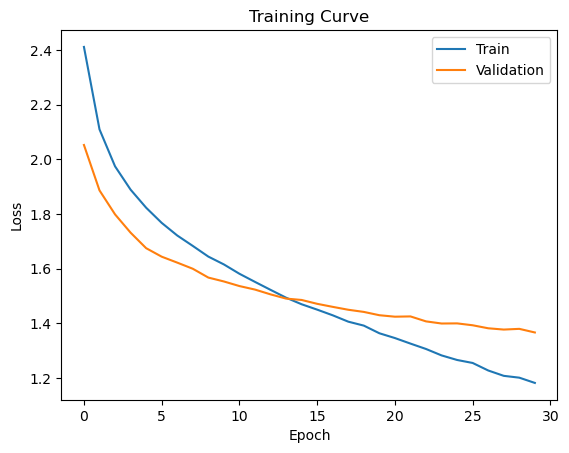

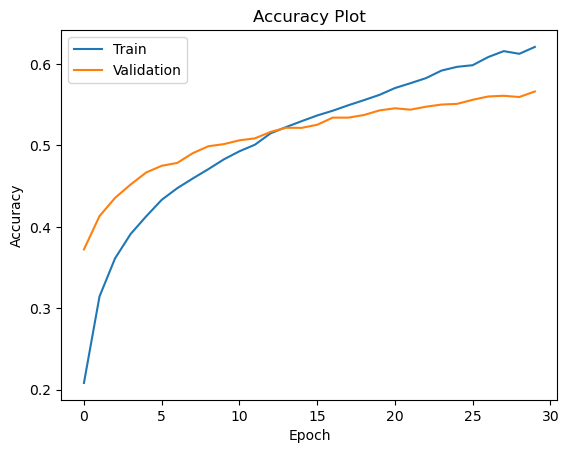

In [14]:
epoch_size = 30
epochs = np.linspace(0, 29, num=30)
train_acc = np.full(30, 1) - train_err
val_acc = np.full(30, 1) - val_err

#print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

Model 3: bs = 128, lr = 0.0001, epoch = 40, drop out = 0.4
bs128_lr0.0001_epoch39

In [16]:
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1024, shuffle=True)

In [17]:
net3 = CNN2(fc1_out = 256, fc2_out = 64, dropout = 0.4)
train_err, train_loss, val_err, val_loss = train(net3, train_loader, val_loader, batch_size = 128, lr=0.0001, num_epochs = 40)


  2%|▎         | 1/40 [00:59<38:45, 59.63s/it]

Epoch 0: Train err: 0.770752348558471 Val err: 0.609599395313681 Train loss: 2.3438905072953418 Val loss: 1.9841085956210183


  5%|▌         | 2/40 [01:57<37:01, 58.46s/it]

Epoch 1: Train err: 0.6616456106252024 Val err: 0.5676965230536659 Train loss: 2.030874324277275 Val loss: 1.8169589269728887


  8%|▊         | 3/40 [02:55<35:58, 58.33s/it]

Epoch 2: Train err: 0.6158487204405572 Val err: 0.5495086923658352 Train loss: 1.904380224838158 Val loss: 1.7276963903790428


 10%|█         | 4/40 [03:51<34:23, 57.32s/it]

Epoch 3: Train err: 0.5905814706835115 Val err: 0.532785336356765 Train loss: 1.8266343678217478 Val loss: 1.670900747889564


 12%|█▎        | 5/40 [04:47<33:12, 56.92s/it]

Epoch 4: Train err: 0.5643221574344023 Val err: 0.520880574452003 Train loss: 1.7544315929857561 Val loss: 1.6280884402138847


 15%|█▌        | 6/40 [05:43<32:02, 56.55s/it]

Epoch 5: Train err: 0.5450275348234532 Val err: 0.5109599395313681 Train loss: 1.701167638746568 Val loss: 1.6006890762419927


 18%|█▊        | 7/40 [06:39<31:05, 56.52s/it]

Epoch 6: Train err: 0.5328393262066732 Val err: 0.5014644746787604 Train loss: 1.658633724086643 Val loss: 1.5764076652980985


 20%|██        | 8/40 [07:35<30:02, 56.34s/it]

Epoch 7: Train err: 0.5170472951085195 Val err: 0.4967403628117914 Train loss: 1.6170075461654465 Val loss: 1.5526267687479656


 22%|██▎       | 9/40 [08:32<29:07, 56.38s/it]

Epoch 8: Train err: 0.5047983479105929 Val err: 0.48516628873771733 Train loss: 1.5692917108535767 Val loss: 1.5202708811987014


 25%|██▌       | 10/40 [09:28<28:10, 56.37s/it]

Epoch 9: Train err: 0.49501943634596696 Val err: 0.4856386999244142 Train loss: 1.5456408027540216 Val loss: 1.5213313556852794


 28%|██▊       | 11/40 [10:24<27:07, 56.12s/it]

Epoch 10: Train err: 0.4826085195983155 Val err: 0.47557634164777024 Train loss: 1.5107561322073861 Val loss: 1.4928491910298665


 30%|███       | 12/40 [11:20<26:11, 56.11s/it]

Epoch 11: Train err: 0.47339650145772594 Val err: 0.4742063492063492 Train loss: 1.4807185055060708 Val loss: 1.4800809110913957


 32%|███▎      | 13/40 [12:17<25:23, 56.41s/it]

Epoch 12: Train err: 0.4639212827988338 Val err: 0.4700963718820862 Train loss: 1.454448371662377 Val loss: 1.4724089361372448


 35%|███▌      | 14/40 [13:14<24:35, 56.74s/it]

Epoch 13: Train err: 0.45855604146420476 Val err: 0.46674225245653816 Train loss: 1.4257483229118308 Val loss: 1.4641455525443667


 38%|███▊      | 15/40 [14:10<23:34, 56.56s/it]

Epoch 14: Train err: 0.4492225461613217 Val err: 0.46130952380952384 Train loss: 1.4039089327649132 Val loss: 1.4467656839461553


 40%|████      | 16/40 [15:07<22:37, 56.56s/it]

Epoch 15: Train err: 0.44021298995788793 Val err: 0.45686885865457294 Train loss: 1.3748111663087044 Val loss: 1.4342082738876343


 42%|████▎     | 17/40 [16:03<21:38, 56.48s/it]

Epoch 16: Train err: 0.4327218982831228 Val err: 0.4584278155706727 Train loss: 1.349614080060949 Val loss: 1.4266428493318104


 45%|████▌     | 18/40 [16:59<20:40, 56.39s/it]

Epoch 17: Train err: 0.4232669258179462 Val err: 0.4544123204837491 Train loss: 1.3269174960610781 Val loss: 1.4214958179564703


 48%|████▊     | 19/40 [17:56<19:43, 56.37s/it]

Epoch 18: Train err: 0.4179624230644639 Val err: 0.4494992441421013 Train loss: 1.307597347182931 Val loss: 1.4108192977451144


 50%|█████     | 20/40 [18:53<18:51, 56.59s/it]

Epoch 19: Train err: 0.4104713313896987 Val err: 0.446192365835223 Train loss: 1.2787147917895738 Val loss: 1.4015719095865886


 52%|█████▎    | 21/40 [19:49<17:51, 56.42s/it]

Epoch 20: Train err: 0.404316488500162 Val err: 0.44576719576719576 Train loss: 1.2632346712245843 Val loss: 1.3933251414980208


 55%|█████▌    | 22/40 [20:45<16:56, 56.45s/it]

Epoch 21: Train err: 0.39692662779397475 Val err: 0.44288548752834467 Train loss: 1.2399400179250253 Val loss: 1.3884231646855671


 57%|█████▊    | 23/40 [21:41<15:57, 56.30s/it]

Epoch 22: Train err: 0.3913791707159054 Val err: 0.43868102796674224 Train loss: 1.2189953652997092 Val loss: 1.3798240139370872


 60%|██████    | 24/40 [22:37<14:59, 56.23s/it]

Epoch 23: Train err: 0.38818027210884354 Val err: 0.43934240362811794 Train loss: 1.2019903656732234 Val loss: 1.379436833517892


 62%|██████▎   | 25/40 [23:33<14:01, 56.07s/it]

Epoch 24: Train err: 0.37769274376417233 Val err: 0.4357520786092215 Train loss: 1.1785766547208005 Val loss: 1.3704347156343006


 65%|██████▌   | 26/40 [24:30<13:06, 56.19s/it]

Epoch 25: Train err: 0.3710924846128928 Val err: 0.4347127739984883 Train loss: 1.1636322997703454 Val loss: 1.364889491172064


 68%|██████▊   | 27/40 [25:29<12:21, 57.05s/it]

Epoch 26: Train err: 0.3664965986394558 Val err: 0.43211451247165533 Train loss: 1.1450228864047194 Val loss: 1.3581679718835014


 70%|███████   | 28/40 [26:26<11:24, 57.01s/it]

Epoch 27: Train err: 0.36214366699060574 Val err: 0.4317838246409675 Train loss: 1.1252560322148812 Val loss: 1.362279006413051


 72%|███████▎  | 29/40 [27:24<10:30, 57.34s/it]

Epoch 28: Train err: 0.3551384839650146 Val err: 0.4285241874527589 Train loss: 1.1071933301001633 Val loss: 1.350228746732076


 75%|███████▌  | 30/40 [28:20<09:29, 56.91s/it]

Epoch 29: Train err: 0.349651765468092 Val err: 0.42545351473922904 Train loss: 1.0878308404603771 Val loss: 1.3438490345364524


 78%|███████▊  | 31/40 [29:16<08:31, 56.83s/it]

Epoch 30: Train err: 0.3477486232588273 Val err: 0.42644557823129253 Train loss: 1.0817597755496366 Val loss: 1.3493849947339012


 80%|████████  | 32/40 [30:13<07:35, 56.90s/it]

Epoch 31: Train err: 0.34193796566245543 Val err: 0.4252173091458806 Train loss: 1.0606382913848897 Val loss: 1.3402619191578455


 82%|████████▎ | 33/40 [31:10<06:38, 56.90s/it]

Epoch 32: Train err: 0.3360058309037901 Val err: 0.42243008314436886 Train loss: 1.0485110151644197 Val loss: 1.339216050647554


 85%|████████▌ | 34/40 [32:07<05:41, 56.89s/it]

Epoch 33: Train err: 0.3321590540978296 Val err: 0.42167422524565384 Train loss: 1.033217173475058 Val loss: 1.3362049772625877


 88%|████████▊ | 35/40 [33:04<04:44, 56.80s/it]

Epoch 34: Train err: 0.3302964042759961 Val err: 0.42266628873771733 Train loss: 1.0270248548045677 Val loss: 1.333941312063308


 90%|█████████ | 36/40 [34:02<03:48, 57.19s/it]

Epoch 35: Train err: 0.3248704243602203 Val err: 0.4212018140589569 Train loss: 1.0090648399115845 Val loss: 1.342031234786624


 92%|█████████▎| 37/40 [35:00<02:52, 57.43s/it]

Epoch 36: Train err: 0.3222181729834791 Val err: 0.41770597127739983 Train loss: 0.998328246292055 Val loss: 1.3336564813341414


 95%|█████████▌| 38/40 [35:57<01:55, 57.54s/it]

Epoch 37: Train err: 0.3159013605442177 Val err: 0.4166666666666667 Train loss: 0.9818913124385893 Val loss: 1.3241847923823766


 98%|█████████▊| 39/40 [36:54<00:57, 57.21s/it]

Epoch 38: Train err: 0.3111839974084872 Val err: 0.41463529856387 Train loss: 0.9674866041988907 Val loss: 1.3224246899286907


100%|██████████| 40/40 [37:51<00:00, 56.79s/it]

Epoch 39: Train err: 0.3095440557175251 Val err: 0.41761148904006046 Train loss: 0.9611894151707387 Val loss: 1.326066596167428


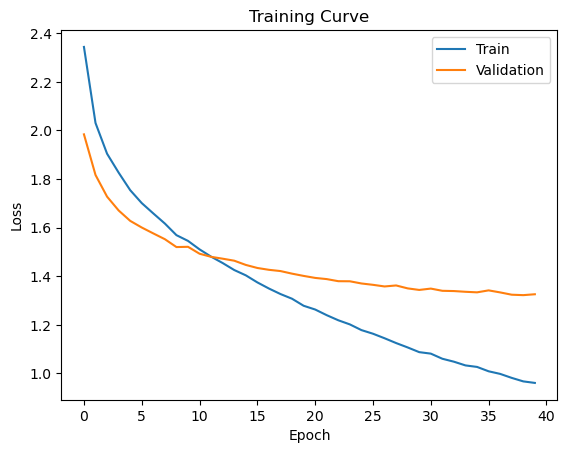

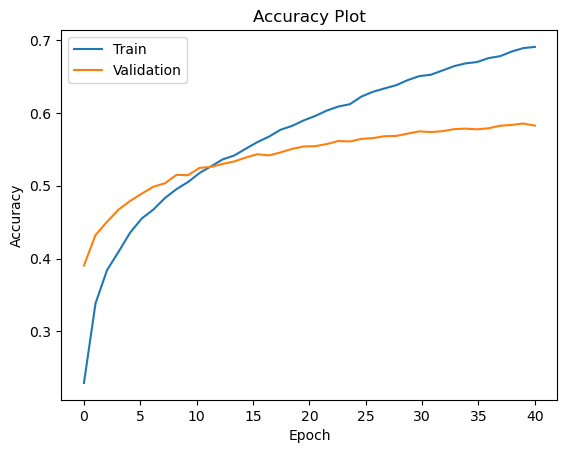

In [19]:
epoch_size = 40
epochs = np.linspace(0, epoch_size, epoch_size)
train_acc = np.full(epoch_size, 1) - train_err
val_acc = np.full(epoch_size, 1) - val_err

#print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [22]:
net4 = CNN2(fc1_out = 256, fc2_out = 64, dropout = 0.4)
train_err, train_loss, val_err, val_loss = train(net4, train_loader, val_loader, batch_size = 128, lr=0.00005, num_epochs = 43)


  2%|▏         | 1/43 [00:58<40:56, 58.48s/it]

Epoch 0: Train err: 0.7954122125040493 Val err: 0.6344009826152683 Train loss: 2.423706950918998 Val loss: 2.0790639491308305


  5%|▍         | 2/43 [01:57<40:05, 58.66s/it]

Epoch 1: Train err: 0.6938977972141237 Val err: 0.5999149659863946 Train loss: 2.1351596450558596 Val loss: 1.9224014111927576


  7%|▋         | 3/43 [02:53<38:20, 57.52s/it]

Epoch 2: Train err: 0.6519476838354389 Val err: 0.5753968253968254 Train loss: 2.0075651885931975 Val loss: 1.8284124249503726


  9%|▉         | 4/43 [03:48<36:38, 56.37s/it]

Epoch 3: Train err: 0.6251619695497247 Val err: 0.5601851851851852 Train loss: 1.9326310117627672 Val loss: 1.7666958570480347


 12%|█▏        | 5/43 [04:42<35:22, 55.86s/it]

Epoch 4: Train err: 0.6016156462585034 Val err: 0.5436507936507936 Train loss: 1.8660598712263947 Val loss: 1.7160368703660511


 14%|█▍        | 6/43 [05:37<34:07, 55.34s/it]

Epoch 5: Train err: 0.5829891480401684 Val err: 0.5316043083900227 Train loss: 1.816421017745616 Val loss: 1.6830974079313732


 16%|█▋        | 7/43 [06:36<34:00, 56.67s/it]

Epoch 6: Train err: 0.5710236475542598 Val err: 0.5249433106575964 Train loss: 1.7763290680134234 Val loss: 1.6577571233113606


 19%|█▊        | 8/43 [07:30<32:35, 55.88s/it]

Epoch 7: Train err: 0.5578838678328474 Val err: 0.5153533635676493 Train loss: 1.7357212545958207 Val loss: 1.6363725718997775


 21%|██        | 9/43 [08:25<31:24, 55.42s/it]

Epoch 8: Train err: 0.5448048266925818 Val err: 0.5083144368858654 Train loss: 1.6967822356545246 Val loss: 1.6040255285444713


 23%|██▎       | 10/43 [09:21<30:38, 55.72s/it]

Epoch 9: Train err: 0.5347222222222222 Val err: 0.5091175359032502 Train loss: 1.6667905863702606 Val loss: 1.59261573496319


 26%|██▌       | 11/43 [10:19<29:59, 56.22s/it]

Epoch 10: Train err: 0.5264010366051183 Val err: 0.5034486016628874 Train loss: 1.6471238908372394 Val loss: 1.580599960826692


 28%|██▊       | 12/43 [11:17<29:22, 56.87s/it]

Epoch 11: Train err: 0.5199829931972789 Val err: 0.4970710506424792 Train loss: 1.6136408238213298 Val loss: 1.5576874698911394


 30%|███       | 13/43 [12:12<28:09, 56.30s/it]

Epoch 12: Train err: 0.5110139293812763 Val err: 0.4917800453514739 Train loss: 1.5939272608164061 Val loss: 1.5470502376556396


 33%|███▎      | 14/43 [13:08<27:13, 56.32s/it]

Epoch 13: Train err: 0.5026522513767412 Val err: 0.48894557823129253 Train loss: 1.570421854757892 Val loss: 1.5340673355829149


 35%|███▍      | 15/43 [14:06<26:26, 56.67s/it]

Epoch 14: Train err: 0.4944120505344995 Val err: 0.4843631897203326 Train loss: 1.551195622725808 Val loss: 1.5272061086836315


 37%|███▋      | 16/43 [15:01<25:20, 56.32s/it]

Epoch 15: Train err: 0.48756883705863296 Val err: 0.48011148904006046 Train loss: 1.5227894560660722 Val loss: 1.506768402599153


 40%|███▉      | 17/43 [15:59<24:31, 56.60s/it]

Epoch 16: Train err: 0.47681810819565923 Val err: 0.4769935752078609 Train loss: 1.497974344485782 Val loss: 1.4955093065897624


 42%|████▏     | 18/43 [16:55<23:34, 56.60s/it]

Epoch 17: Train err: 0.4727081308713962 Val err: 0.4732142857142857 Train loss: 1.4801489361827238 Val loss: 1.484957950455802


 44%|████▍     | 19/43 [17:50<22:29, 56.22s/it]

Epoch 18: Train err: 0.4709467120181406 Val err: 0.4750094482237339 Train loss: 1.4667527048698978 Val loss: 1.4806907971700032


 47%|████▋     | 20/43 [18:45<21:24, 55.83s/it]

Epoch 19: Train err: 0.4589204729510852 Val err: 0.4691987906273621 Train loss: 1.43908925748242 Val loss: 1.472100399789356


 49%|████▉     | 21/43 [19:40<20:18, 55.37s/it]

Epoch 20: Train err: 0.4506397797214124 Val err: 0.4656084656084656 Train loss: 1.4157645717803677 Val loss: 1.4557052793956937


 51%|█████     | 22/43 [20:35<19:20, 55.27s/it]

Epoch 21: Train err: 0.4487366375121477 Val err: 0.4657501889644747 Train loss: 1.4047768792340174 Val loss: 1.4509875093187605


 53%|█████▎    | 23/43 [21:30<18:26, 55.31s/it]

Epoch 22: Train err: 0.4442824748947198 Val err: 0.46381330309901736 Train loss: 1.3897040841492965 Val loss: 1.4427076067243303


 56%|█████▌    | 24/43 [22:25<17:25, 55.04s/it]

Epoch 23: Train err: 0.4366091674765144 Val err: 0.4603174603174603 Train loss: 1.369575105182865 Val loss: 1.4313897291819255


 58%|█████▊    | 25/43 [23:19<16:28, 54.92s/it]

Epoch 24: Train err: 0.4309402332361516 Val err: 0.45762471655328796 Train loss: 1.354610034530027 Val loss: 1.4320628643035889


 60%|██████    | 26/43 [24:14<15:33, 54.92s/it]

Epoch 25: Train err: 0.42705296404275994 Val err: 0.4555933484504913 Train loss: 1.333899097739106 Val loss: 1.4244469971883864


 63%|██████▎   | 27/43 [25:10<14:41, 55.11s/it]

Epoch 26: Train err: 0.4225178166504697 Val err: 0.4541761148904006 Train loss: 1.3171749541178885 Val loss: 1.417424582299732


 65%|██████▌   | 28/43 [26:05<13:46, 55.12s/it]

Epoch 27: Train err: 0.4176789763524457 Val err: 0.44968820861678005 Train loss: 1.304964492049242 Val loss: 1.4134901478177024


 67%|██████▋   | 29/43 [27:00<12:53, 55.26s/it]

Epoch 28: Train err: 0.4078595724003887 Val err: 0.4468537414965986 Train loss: 1.280543928010476 Val loss: 1.404855972244626


 70%|██████▉   | 30/43 [27:56<12:01, 55.51s/it]

Epoch 29: Train err: 0.4078595724003887 Val err: 0.44590891912320485 Train loss: 1.2705377411348215 Val loss: 1.3953042995362055


 72%|███████▏  | 31/43 [28:52<11:06, 55.54s/it]

Epoch 30: Train err: 0.4013605442176871 Val err: 0.4456727135298564 Train loss: 1.257112518030127 Val loss: 1.3978997185116722


 74%|███████▍  | 32/43 [29:48<10:11, 55.57s/it]

Epoch 31: Train err: 0.39591431810819566 Val err: 0.4446806500377929 Train loss: 1.2433523690144632 Val loss: 1.3849407377697172


 77%|███████▋  | 33/43 [30:42<09:11, 55.12s/it]

Epoch 32: Train err: 0.39502348558471007 Val err: 0.4379724111866969 Train loss: 1.2321707946031204 Val loss: 1.3771775960922241


 79%|███████▉  | 34/43 [31:37<08:17, 55.23s/it]

Epoch 33: Train err: 0.38903061224489793 Val err: 0.43820861678004536 Train loss: 1.212623700113494 Val loss: 1.3759391080765497


 81%|████████▏ | 35/43 [32:33<07:23, 55.39s/it]

Epoch 34: Train err: 0.3805474570780693 Val err: 0.4398148148148148 Train loss: 1.2023581607662952 Val loss: 1.3744707107543945


 84%|████████▎ | 36/43 [33:30<06:32, 56.00s/it]

Epoch 35: Train err: 0.37965662455458377 Val err: 0.43934240362811794 Train loss: 1.1851014423864492 Val loss: 1.3739550454275948


 86%|████████▌ | 37/43 [34:27<05:36, 56.15s/it]

Epoch 36: Train err: 0.376498218334953 Val err: 0.43542139077853365 Train loss: 1.1728855637071047 Val loss: 1.3680180935632615


 88%|████████▊ | 38/43 [35:22<04:38, 55.78s/it]

Epoch 37: Train err: 0.3691893424036281 Val err: 0.43428760393046106 Train loss: 1.1570855416164496 Val loss: 1.3590558369954426


 91%|█████████ | 39/43 [36:17<03:41, 55.44s/it]

Epoch 38: Train err: 0.36872367994816974 Val err: 0.4335789871504157 Train loss: 1.150718051380444 Val loss: 1.3542043084190005


 93%|█████████▎| 40/43 [37:11<02:45, 55.11s/it]

Epoch 39: Train err: 0.3623866213151927 Val err: 0.42975245653817085 Train loss: 1.1320940932461634 Val loss: 1.351747745559329


 95%|█████████▌| 41/43 [38:06<01:50, 55.04s/it]

Epoch 40: Train err: 0.3598558471007451 Val err: 0.4277683295540438 Train loss: 1.1173540342965893 Val loss: 1.3463595935276575


 98%|█████████▊| 42/43 [39:00<00:54, 54.95s/it]

Epoch 41: Train err: 0.35574586977648204 Val err: 0.4309334845049131 Train loss: 1.1052409680704995 Val loss: 1.3429983683994837


100%|██████████| 43/43 [39:56<00:00, 55.73s/it]

Epoch 42: Train err: 0.351149983803045 Val err: 0.4261621315192744 Train loss: 1.0933742845923171 Val loss: 1.336508313814799


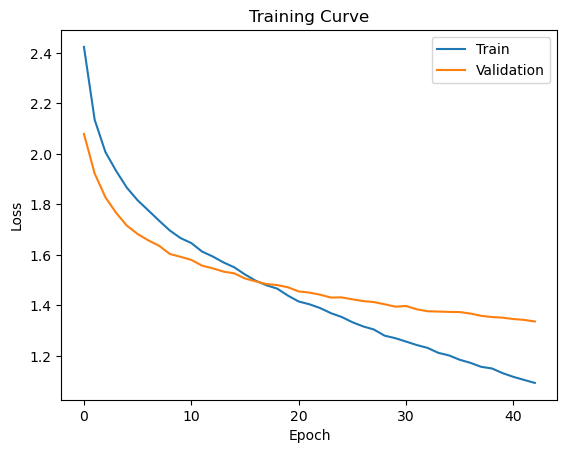

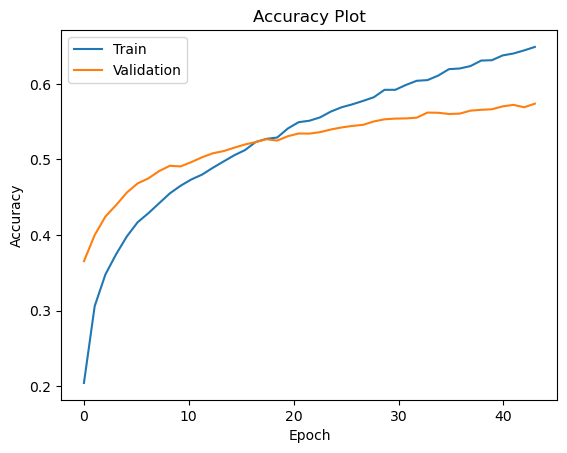

In [23]:
epoch_size = 43
epochs = np.linspace(0, epoch_size, epoch_size)
train_acc = np.full(epoch_size, 1) - train_err
val_acc = np.full(epoch_size, 1) - val_err

#print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [24]:
train_size = int(0.8 * len(alexembed))
val_size = len(alexembed) - train_size
train_set, val_set = torch.utils.data.random_split(alexembed, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1024, shuffle=True)

In [25]:
net5 = CNN2(fc1_out = 256, fc2_out = 64, dropout = 0.42)
train_err, train_loss, val_err, val_loss = train(net5, train_loader, val_loader, batch_size = 128, lr=0.0001, num_epochs = 43)


  2%|▏         | 1/43 [01:00<42:14, 60.35s/it]

Epoch 0: Train err: 0.7709396258503401 Val err: 0.6152919501133787 Train loss: 2.3422223348466176 Val loss: 1.972417141710009


  5%|▍         | 2/43 [01:59<40:46, 59.66s/it]

Epoch 1: Train err: 0.6623618197278912 Val err: 0.5569019274376418 Train loss: 2.03516203773265 Val loss: 1.7853908709117345


  7%|▋         | 3/43 [02:58<39:41, 59.54s/it]

Epoch 2: Train err: 0.617577239229025 Val err: 0.5357142857142857 Train loss: 1.9100452656107965 Val loss: 1.7231759003230505


  9%|▉         | 4/43 [03:57<38:33, 59.31s/it]

Epoch 3: Train err: 0.5888959750566893 Val err: 0.5203373015873016 Train loss: 1.8272106301487168 Val loss: 1.665724984237126


 12%|█▏        | 5/43 [04:56<37:28, 59.17s/it]

Epoch 4: Train err: 0.5685586734693877 Val err: 0.5089285714285714 Train loss: 1.7636659545422682 Val loss: 1.625954508781433


 14%|█▍        | 6/43 [05:56<36:36, 59.36s/it]

Epoch 5: Train err: 0.549922052154195 Val err: 0.5023384353741497 Train loss: 1.7123954215017305 Val loss: 1.5905980212347848


 16%|█▋        | 7/43 [06:57<35:57, 59.93s/it]

Epoch 6: Train err: 0.5369189342403629 Val err: 0.48681972789115646 Train loss: 1.670179743074776 Val loss: 1.5592931423868452


 19%|█▊        | 8/43 [07:56<34:48, 59.67s/it]

Epoch 7: Train err: 0.5236855158730159 Val err: 0.48696145124716556 Train loss: 1.628664201079042 Val loss: 1.5249453101839339


 21%|██        | 9/43 [08:55<33:42, 59.50s/it]

Epoch 8: Train err: 0.5127728174603174 Val err: 0.4779620181405896 Train loss: 1.597191097244384 Val loss: 1.5039223177092416


 23%|██▎       | 10/43 [09:55<32:41, 59.45s/it]

Epoch 9: Train err: 0.5004251700680272 Val err: 0.47534013605442177 Train loss: 1.5621281564911478 Val loss: 1.4900030067988805


 26%|██▌       | 11/43 [10:54<31:42, 59.45s/it]

Epoch 10: Train err: 0.48921130952380953 Val err: 0.46924603174603174 Train loss: 1.5333708138152315 Val loss: 1.4739890694618225


 28%|██▊       | 12/43 [11:54<30:48, 59.63s/it]

Epoch 11: Train err: 0.4826920351473923 Val err: 0.4676162131519274 Train loss: 1.5095437824590947 Val loss: 1.4678490502493722


 30%|███       | 13/43 [12:54<29:49, 59.66s/it]

Epoch 12: Train err: 0.4763499149659864 Val err: 0.460671768707483 Train loss: 1.4795964664342451 Val loss: 1.4481805222375053


 33%|███▎      | 14/43 [13:53<28:47, 59.58s/it]

Epoch 13: Train err: 0.4665355725623583 Val err: 0.46364795918367346 Train loss: 1.4555068740498722 Val loss: 1.4414801171847753


 35%|███▍      | 15/43 [14:53<27:49, 59.63s/it]

Epoch 14: Train err: 0.4568098072562358 Val err: 0.4494047619047619 Train loss: 1.4260916501756697 Val loss: 1.4259277156421117


 37%|███▋      | 16/43 [15:53<26:51, 59.68s/it]

Epoch 15: Train err: 0.4499716553287982 Val err: 0.4482001133786848 Train loss: 1.4027021144793417 Val loss: 1.4146214638437544


 40%|███▉      | 17/43 [16:54<26:00, 60.00s/it]

Epoch 16: Train err: 0.443983843537415 Val err: 0.4453656462585034 Train loss: 1.3845910074489187 Val loss: 1.4128496646881104


 42%|████▏     | 18/43 [17:52<24:50, 59.61s/it]

Epoch 17: Train err: 0.4364547902494331 Val err: 0.44061791383219956 Train loss: 1.3646316760791943 Val loss: 1.39519168649401


 44%|████▍     | 19/43 [18:53<23:58, 59.92s/it]

Epoch 18: Train err: 0.42860685941043086 Val err: 0.44040532879818595 Train loss: 1.3445487773877964 Val loss: 1.387623233454568


 47%|████▋     | 20/43 [19:52<22:48, 59.51s/it]

Epoch 19: Train err: 0.42217616213151926 Val err: 0.43700396825396826 Train loss: 1.3168117094472422 Val loss: 1.3756429382732935


 49%|████▉     | 21/43 [20:50<21:42, 59.21s/it]

Epoch 20: Train err: 0.41971371882086167 Val err: 0.4308390022675737 Train loss: 1.3062008043535713 Val loss: 1.3651319231305803


 51%|█████     | 22/43 [21:48<20:35, 58.84s/it]

Epoch 21: Train err: 0.4150545634920635 Val err: 0.4293509070294785 Train loss: 1.285292342136236 Val loss: 1.3635896784918649


 53%|█████▎    | 23/43 [22:47<19:37, 58.88s/it]

Epoch 22: Train err: 0.40396471088435376 Val err: 0.42885487528344673 Train loss: 1.2694668031874157 Val loss: 1.359064051083156


 56%|█████▌    | 24/43 [23:45<18:36, 58.75s/it]

Epoch 23: Train err: 0.4039824263038549 Val err: 0.4272250566893424 Train loss: 1.2587595671212592 Val loss: 1.3542856999805994


 58%|█████▊    | 25/43 [24:43<17:33, 58.53s/it]

Epoch 24: Train err: 0.3952841553287982 Val err: 0.4280045351473923 Train loss: 1.2323380618138648 Val loss: 1.3513373306819372


 60%|██████    | 26/43 [25:43<16:38, 58.71s/it]

Epoch 25: Train err: 0.39101473922902497 Val err: 0.41843820861678005 Train loss: 1.222621993683363 Val loss: 1.340337029525212


 63%|██████▎   | 27/43 [26:42<15:43, 58.99s/it]

Epoch 26: Train err: 0.38885345804988664 Val err: 0.4219812925170068 Train loss: 1.208149993230426 Val loss: 1.3332774468830653


 65%|██████▌   | 28/43 [27:41<14:42, 58.86s/it]

Epoch 27: Train err: 0.3813421201814059 Val err: 0.4164540816326531 Train loss: 1.1875664821557717 Val loss: 1.3263214656284876


 67%|██████▋   | 29/43 [28:39<13:42, 58.71s/it]

Epoch 28: Train err: 0.3776218820861678 Val err: 0.4191468253968254 Train loss: 1.1692065070816178 Val loss: 1.3313233426639013


 70%|██████▉   | 30/43 [29:38<12:44, 58.82s/it]

Epoch 29: Train err: 0.37287414965986393 Val err: 0.4168792517006803 Train loss: 1.1602914730707805 Val loss: 1.3242741567747933


 72%|███████▏  | 31/43 [30:36<11:42, 58.52s/it]

Epoch 30: Train err: 0.3731221655328798 Val err: 0.4165249433106576 Train loss: 1.1504559124948757 Val loss: 1.3161066004208155


 74%|███████▍  | 32/43 [31:34<10:40, 58.26s/it]

Epoch 31: Train err: 0.3636621315192744 Val err: 0.41404478458049887 Train loss: 1.1295159268541402 Val loss: 1.3198132429804121


 77%|███████▋  | 33/43 [32:32<09:42, 58.24s/it]

Epoch 32: Train err: 0.3625637755102041 Val err: 0.4130527210884354 Train loss: 1.125296128580089 Val loss: 1.3077423317091805


 79%|███████▉  | 34/43 [33:30<08:44, 58.26s/it]

Epoch 33: Train err: 0.3562216553287982 Val err: 0.4142573696145125 Train loss: 1.106673244310885 Val loss: 1.3119569846561976


 81%|████████▏ | 35/43 [34:30<07:48, 58.60s/it]

Epoch 34: Train err: 0.35131448412698413 Val err: 0.41220238095238093 Train loss: 1.0985272336168355 Val loss: 1.297700081552778


 84%|████████▎ | 36/43 [35:28<06:49, 58.53s/it]

Epoch 35: Train err: 0.35131448412698413 Val err: 0.41340702947845803 Train loss: 1.0889020182378168 Val loss: 1.3089483720915658


 86%|████████▌ | 37/43 [36:27<05:51, 58.55s/it]

Epoch 36: Train err: 0.3450077947845805 Val err: 0.41220238095238093 Train loss: 1.0751351987153224 Val loss: 1.3082778453826904


 88%|████████▊ | 38/43 [37:25<04:52, 58.42s/it]

Epoch 37: Train err: 0.34043721655328796 Val err: 0.40809240362811794 Train loss: 1.0604691925773275 Val loss: 1.288670437676566


 91%|█████████ | 39/43 [38:24<03:54, 58.56s/it]

Epoch 38: Train err: 0.34036635487528344 Val err: 0.4097222222222222 Train loss: 1.0516979117242118 Val loss: 1.287097351891654


 93%|█████████▎| 40/43 [39:25<02:58, 59.39s/it]

Epoch 39: Train err: 0.3346619897959184 Val err: 0.40695861678004536 Train loss: 1.0378974257142635 Val loss: 1.291928265775953


 95%|█████████▌| 41/43 [40:24<01:58, 59.34s/it]

Epoch 40: Train err: 0.33182752267573695 Val err: 0.4070294784580499 Train loss: 1.031771050288834 Val loss: 1.2915063841002328


 98%|█████████▊| 42/43 [41:22<00:58, 58.97s/it]

Epoch 41: Train err: 0.3330676020408163 Val err: 0.40674603174603174 Train loss: 1.0241302163963144 Val loss: 1.2907732129096985


100%|██████████| 43/43 [42:23<00:00, 59.14s/it]

Epoch 42: Train err: 0.32895762471655327 Val err: 0.4052579365079365 Train loss: 1.0135943863937915 Val loss: 1.2819105897630965


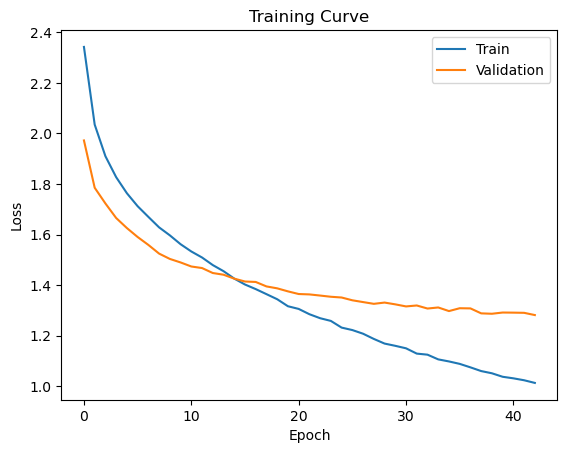

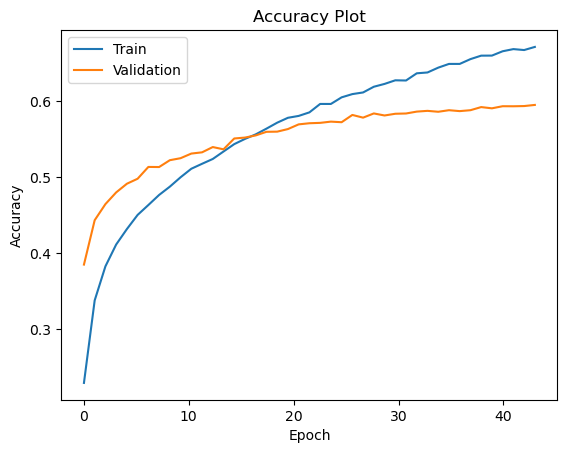

In [26]:
epoch_size = 43
epochs = np.linspace(0, epoch_size, epoch_size)
train_acc = np.full(epoch_size, 1) - train_err
val_acc = np.full(epoch_size, 1) - val_err

#print(train_acc.shape)

plt.title("Training Curve")
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Plot")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()